In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd

from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix

    

In [2]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv", sep=",")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# Get the proportion of nulls in the datset.

nulls = pd.DataFrame(round(100*customer_df.isna().sum()/len(customer_df)))   #take the nulls, we sum them, and then divide to get the proportion
nulls.columns = ["nulls_prop"]
nulls = nulls.rename_axis("columns").reset_index()
nulls

,columns,nulls_prop
0,Customer,0.0
1,State,0.0
2,Customer Lifetime Value,0.0
3,Response,0.0
4,Coverage,0.0
5,Education,0.0
6,Effective To Date,0.0
7,EmploymentStatus,0.0
8,Gender,0.0
9,Income,0.0


No Nulls in our Dataset.

In [6]:
# Standardize header names

data_cols=customer_df.columns
cols = [col_name.lower().replace(' ', '_') for col_name in data_cols]
cols
customer_df.columns=cols 

In [7]:
#Changing "employmentstatus" column to "employment_status"

customer_df.rename(columns={"employmentstatus": "employment_status"}, inplace=True)

In [8]:
#customer is the id, unique, so I can passed it as the index or drop it.

customer_df = customer_df.drop(['customer'], axis=1)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
#change ""number_of_open_complaints" and "number_of_policies" from int to string to be used as categorical.

customer_df[['number_of_open_complaints', 'number_of_policies']] = customer_df[['number_of_open_complaints', 'number_of_policies']].astype(str)

# lab-data-cleaning-and-wrangling

#### 1. Removing Outliers

In [ ]:
#Extract numerical variables

#numerical = customer_df.select_dtypes(include = np.number)
#numerical.describe()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'customer_lifetime_value'),
  Text(1, 0, 'income'),
  Text(2, 0, 'monthly_premium_auto'),
  Text(3, 0, 'months_since_last_claim'),
  Text(4, 0, 'months_since_policy_inception'),
  Text(5, 0, 'total_claim_amount')])

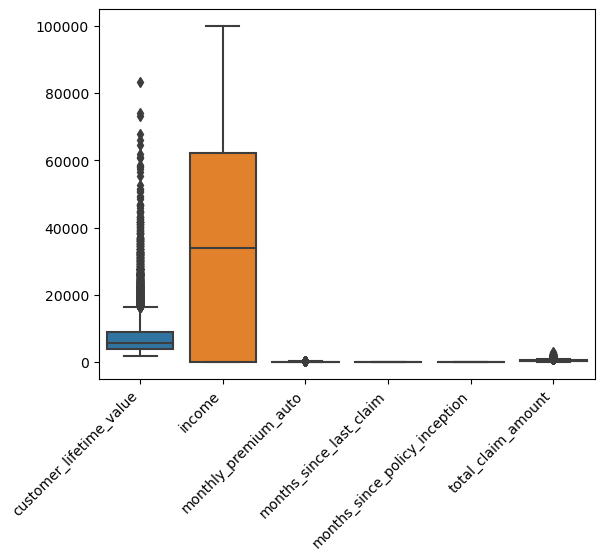

In [10]:
#checking outliers with boxplot

sns.boxplot(data=customer_df)
plt.xticks(rotation=45, ha='right')


We can see the presence of outliers in customer_lifetime_value and total_claim_amount.

<AxesSubplot:xlabel='customer_lifetime_value'>

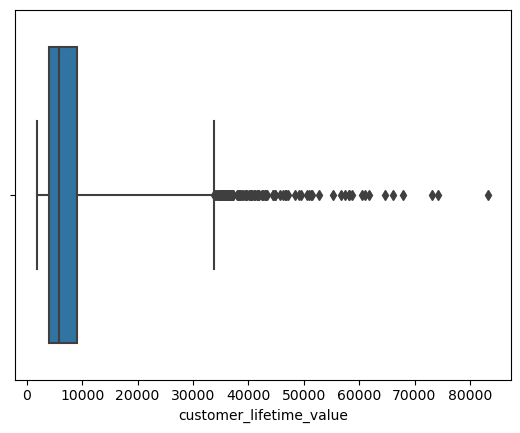

In [11]:
# Let's have a closer look at the outliers in "customer_lifetime_value" and "total_claim_amount" column.

sns.boxplot(customer_df["customer_lifetime_value"], whis=5)

<AxesSubplot:xlabel='total_claim_amount'>

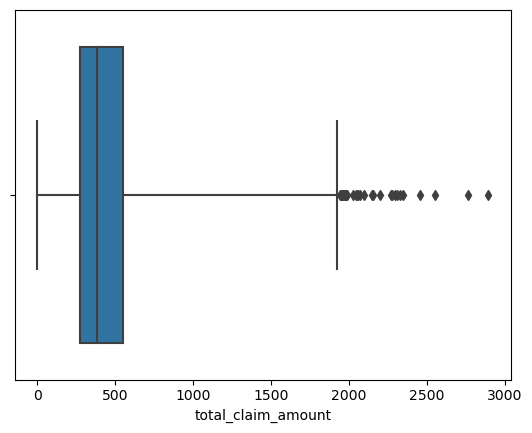

In [12]:
sns.boxplot(customer_df["total_claim_amount"], whis=5)

In [ ]:
### Remove outliers of "customer_lifetime_value" column 
# Finding IQR

#iqr = np.percentile(numerical["customer_lifetime_value"],75) - np.percentile(numerical["customer_lifetime_value"],25)
#iqr

In [ ]:
# Define the limits. Finding upper and lower limits

#upper_limit = np.percentile(numerical["customer_lifetime_value"],75) + 1.5*iqr    
#lower_limit = np.percentile(numerical["customer_lifetime_value"],25) - 1.5*iqr
#upper_limit, lower_limit

In [ ]:
# Find the outliers and remove them from the data

#numerical = numerical[(numerical["customer_lifetime_value"]>lower_limit) & (numerical['customer_lifetime_value']<upper_limit)]

In [ ]:
#sns.boxplot(numerical["customer_lifetime_value"], whis=5)

In [ ]:
### Removing outliers of "total_claim_amount" column 

#iqr = np.percentile(numerical["total_claim_amount"],75) - np.percentile(numerical["total_claim_amount"],25)
#iqr


In [ ]:
#upper_limit = np.percentile(numerical["total_claim_amount"],75) + 1.5*iqr    
#lower_limit = np.percentile(numerical["total_claim_amount"],25) - 1.5*iqr
#upper_limit, lower_limit

In [ ]:
#numerical = numerical[(numerical["total_claim_amount"]>lower_limit) & (numerical['total_claim_amount']<upper_limit)]

In [13]:
#Function to remove outliers from numerical data.

def remove_outliers(customer_df, threshold=1.5, in_columns=customer_df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(customer_df[column],75)
            lower = np.percentile(customer_df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            customer_df = customer_df[(customer_df[column]>lower_limit) & (customer_df[column]<upper_limit)]
    return customer_df

In [14]:
#creating a copy of dataframe before removing outliers

customer_df_outliers = customer_df.copy()

In [15]:
#applying the function to remove outliers

customer_df_outliers = remove_outliers(customer_df, threshold=1.5)

<AxesSubplot:xlabel='customer_lifetime_value'>

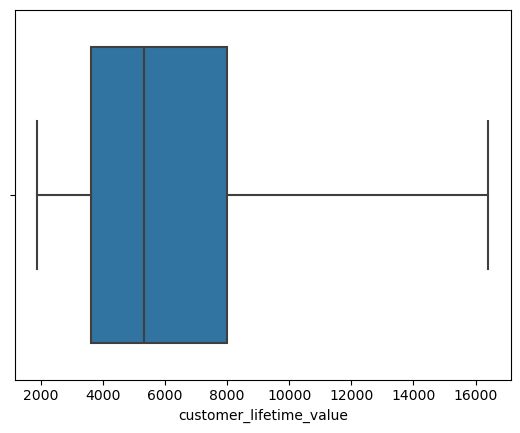

In [16]:
sns.boxplot(customer_df_outliers["customer_lifetime_value"], whis=5)

<AxesSubplot:xlabel='total_claim_amount'>

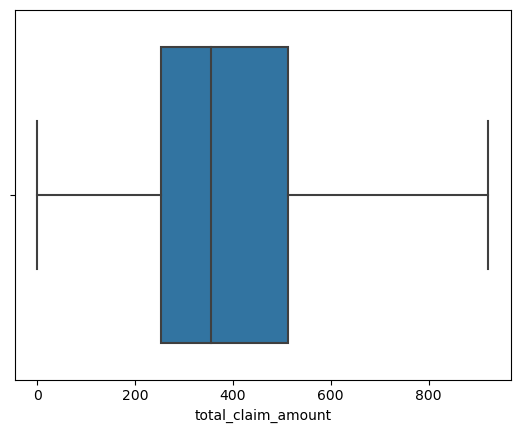

In [17]:
sns.boxplot(customer_df_outliers["total_claim_amount"], whis=5)

In [19]:
# Creating a copy of the dataframe for the data wrangling.

customer_df1 = customer_df_outliers.copy()

#### 3. Normalize the continuous variables. You can use any one method you want.

In [20]:
# Create a new dataframe with only the numerical variables

numerical = customer_df1.select_dtypes(np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
5,8256.297800,62902,69,14,94,159.383042


In [21]:
#Using Minmax Normalization to scale data to the range of 0 and 1.

X_scale = MinMaxScaler().fit(numerical) 
x_minmax = X_scale.transform(numerical) 
x_minmax

array([[0.05965073, 0.56284694, 0.07692308, 0.91428571, 0.05050505,
        0.41715107],
       [0.75738689, 0.48776267, 0.45192308, 0.51428571, 0.38383838,
        0.61412984],
       [0.39613991, 0.        , 0.43269231, 0.51428571, 0.65656566,
        0.57445359],
       ...,
       [0.43184224, 0.        , 0.23076923, 0.25714286, 0.37373737,
        0.85735663],
       [0.38777173, 0.2194517 , 0.33653846, 0.97142857, 0.03030303,
        0.74937464],
       [0.04919683, 0.        , 0.15384615, 0.08571429, 0.90909091,
        0.40065732]])

In [22]:
#Transform array to a DataFrame

num_normalize = pd.DataFrame(x_minmax,columns=numerical.columns)
num_normalize.describe() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
count,7789.000000,7789.000000,7789.000000,7789.000000,7789.000000,7789.000000
mean,0.288410,0.385842,0.239072,0.428516,0.484743,0.411041
std,0.214740,0.303410,0.208677,0.286206,0.281478,0.217117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.118271,0.121623,0.067308,0.171429,0.242424,0.274425
50%,0.236712,0.350177,0.163462,0.400000,0.484848,0.385043
75%,0.420958,0.629140,0.403846,0.657143,0.717172,0.556799
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 4. Encode the categorical variables

In [23]:
categorical = customer_df1.select_dtypes(include=np.object)
categorical.head()

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [24]:
# 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

# change effective_to_date from object to datetime so we can extract months from date.

categorical["effective_to_date"]=pd.to_datetime(categorical["effective_to_date"])

In [25]:
#Extract month   (1 = January, 2 = February)

categorical['effective_to_date_month'] = categorical['effective_to_date'].dt.month

In [26]:
#Extract day of week (Monday=0, Sunday=6)

categorical['effective_to_date_weekday'] = categorical['effective_to_date'].dt.day_of_week

In [27]:
categorical=categorical.drop("effective_to_date", axis=1)

In [28]:
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date_month,effective_to_date_weekday
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2,3
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2,5
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1,3
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2,3
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize,1,1


#### OneHotEncoder

In [29]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit_transform(categorical[["state", "marital_status", "number_of_open_complaints", "number_of_policies", "policy_type", "policy", "renew_offer_type", "sales_channel", "vehicle_class", "effective_to_date_month", "effective_to_date_weekday"]])

<7789x45 sparse matrix of type '<class 'numpy.float64'>'
	with 56040 stored elements in Compressed Sparse Row format>

In [30]:
#tranform array to a dataframe

encoded = encoder.transform(categorical[["state", "marital_status", "number_of_open_complaints", "number_of_policies", "policy_type", "policy", "renew_offer_type", "sales_channel", "vehicle_class", "effective_to_date_month", "effective_to_date_weekday"]]).toarray() 
cat_encoded = pd.DataFrame(encoded)
cat_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Add column names to the dataframe

cat_encoded.columns = encoder.get_feature_names_out()
cat_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,effective_to_date_month_2,effective_to_date_weekday_1,effective_to_date_weekday_2,effective_to_date_weekday_3,effective_to_date_weekday_4,effective_to_date_weekday_5,effective_to_date_weekday_6
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Ordinal Encoding

In [32]:
categorical_ordinal=categorical[["coverage", "employment_status", "location_code", "vehicle_size"]]

In [33]:
categorical_ordinal["coverage"] = categorical_ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [34]:
categorical_ordinal["employment_status"] = categorical_ordinal["employment_status"].map({"Retired" : 0, "Disabled" : 1, "Medical Leave" : 2, "Unemployed" : 3, "Employed" : 4})

In [35]:
categorical_ordinal["location_code"] = categorical_ordinal["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [36]:
categorical_ordinal["vehicle_size"] = categorical_ordinal["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})

In [37]:
categorical_ordinal.head()

,coverage,employment_status,location_code,vehicle_size
0,0,4,0,0
2,2,4,0,0
3,0,3,0,0
4,0,4,1,0
5,0,4,1,0


In [38]:
categorical_ordinal.reset_index(drop=True, inplace=True)
categorical_ordinal.head()

,coverage,employment_status,location_code,vehicle_size
0,0,4,0,0
1,2,4,0,0
2,0,3,0,0
3,0,4,1,0
4,0,4,1,0


In [39]:
# Concatenating OneHotEncoded categoricals with Ordinal Categoricals in a single dataframe

categorical_encoded = pd.concat([cat_encoded, categorical_ordinal], axis=1) 
categorical_encoded.head()



,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,...,effective_to_date_weekday_1,effective_to_date_weekday_2,effective_to_date_weekday_3,effective_to_date_weekday_4,effective_to_date_weekday_5,effective_to_date_weekday_6,coverage,employment_status,location_code,vehicle_size
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,4,0,0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2,4,0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,3,0,0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,4,1,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,4,1,0


In [40]:
# Concatenating categorical_encoded + numerical normalized to get our final DF.

customer_df2 = pd.concat([categorical_encoded, num_normalize], axis=1) 
customer_df2.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,...,coverage,employment_status,location_code,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,4,0,0,0.059651,0.562847,0.076923,0.914286,0.050505,0.417151
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,4,0,0,0.757387,0.487763,0.451923,0.514286,0.383838,0.614130
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3,0,0,0.396140,0.000000,0.432692,0.514286,0.656566,0.574454
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,4,1,0,0.063109,0.438443,0.115385,0.342857,0.444444,0.149671
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,4,1,0,0.438211,0.629140,0.076923,0.400000,0.949495,0.172715


#### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [41]:
customer_df2.info()

# All columns are numerical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_California               7789 non-null   float64
 1   state_Nevada                   7789 non-null   float64
 2   state_Oregon                   7789 non-null   float64
 3   state_Washington               7789 non-null   float64
 4   marital_status_Married         7789 non-null   float64
 5   marital_status_Single          7789 non-null   float64
 6   number_of_open_complaints_1    7789 non-null   float64
 7   number_of_open_complaints_2    7789 non-null   float64
 8   number_of_open_complaints_3    7789 non-null   float64
 9   number_of_open_complaints_4    7789 non-null   float64
 10  number_of_open_complaints_5    7789 non-null   float64
 11  number_of_policies_2           7789 non-null   float64
 12  number_of_policies_3           7789 non-null   f

# Lab | Comparing regression models

#### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [42]:
# Keeping target apart (X-y split)

y = customer_df2['total_claim_amount']  #our target
X = customer_df2.drop(["total_claim_amount"], axis=1)

In [43]:
# Splitting data intro train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2. Try linear regression with all the data to see whether we are getting good results.

In [44]:
# Apply Linear Regression Model

from sklearn.linear_model import LinearRegression  

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
# Model Validation

predictions  = model.predict(X_test)
predictions

array([0.32614599, 0.37790156, 0.56805818, ..., 0.47980276, 0.58865769,
       0.38905726])

In [46]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.4785341631038432
RMSE =  0.15741029469810733
MSE =  0.024778000876944997


<AxesSubplot:xlabel='total_claim_amount'>

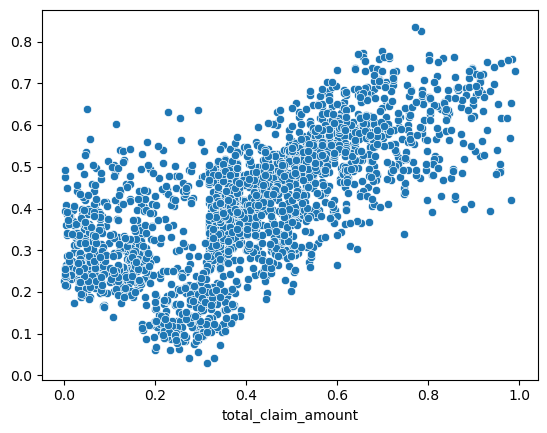

In [47]:
sns.scatterplot(y = predictions, x = y_test)

R2 is 0.47. The closer the r-squared value is to 1, the better the fit.

RMSE is 0.157. Min value of target is 0, and 75% of target values are below 0.556. therefore 0,151 is not so good.   


#### 3. Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [48]:
def different_models(models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = models
    model.fit(X_train,y_train) 
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    print("The R2 of the model in the test set is: %4.2f" % (r2))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The mean absolute error of the model in the test set is: " , MAE)
    sns.scatterplot(y = predictions, x = y_test)

#### 4. Use the function to check LinearRegressor and KNeighborsRegressor.

The R2 of the model in the test set is: 0.48
The root mean squared error of the model in the test set is:   0.16
The mean squared error of the model in the test set is:   0.02
The mean absolute error of the model in the test set is:  0.12116996000396481


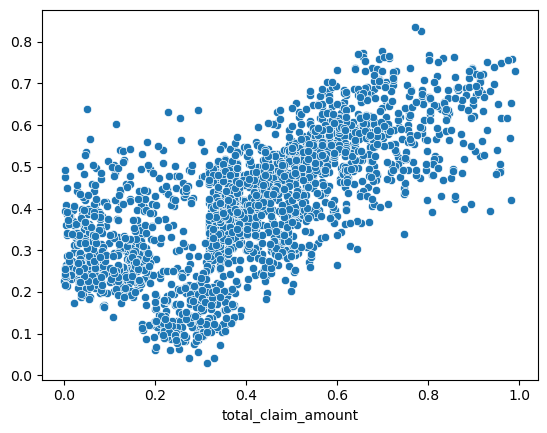

In [49]:
different_models(LinearRegression())

The R2 of the model in the test set is: 0.56
The root mean squared error of the model in the test set is:   0.14
The mean squared error of the model in the test set is:   0.02
The mean absolute error of the model in the test set is:  0.10966771321828238


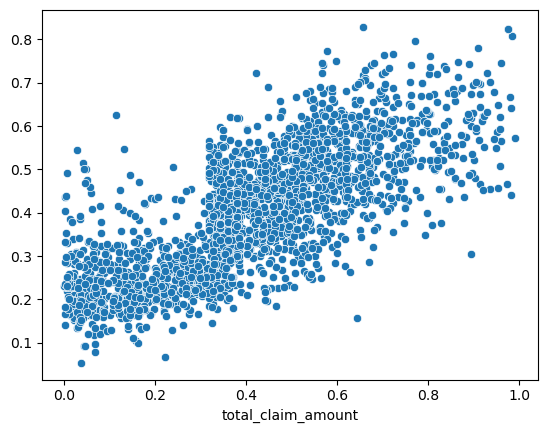

In [50]:
from sklearn.neighbors import KNeighborsRegressor 

different_models(KNeighborsRegressor(n_neighbors=10))

In [51]:
# Let's find the best K

scores = [] # We will store here the R2 values for each of our KNN models with different K-values.
 # Looping to try different K's between 2-10
for i in range(2,20):
    model = KNeighborsRegressor(n_neighbors=i)  # we apply model with  (weights='uniform') by default
    model.fit(X_train, y_train)   # we train
    scores.append(model.score(X_test, y_test))    

Text(0, 0.5, 'R2')

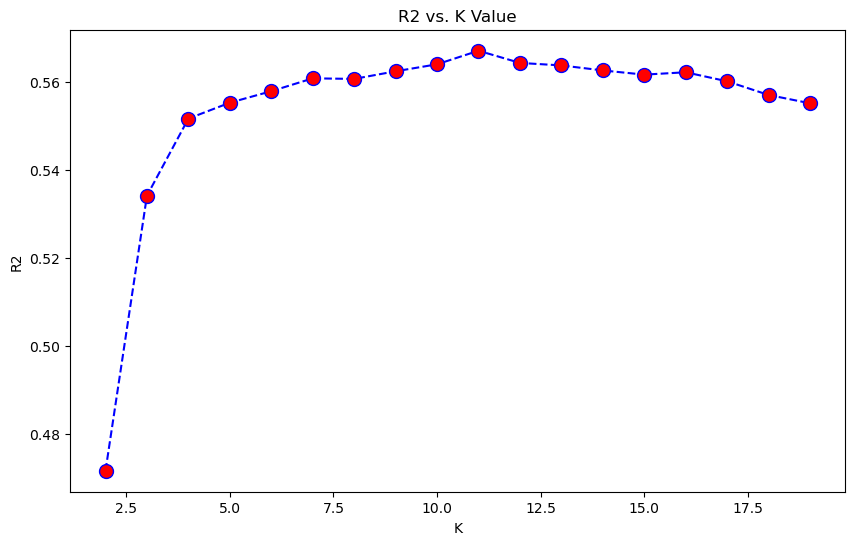

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20), scores, color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

The maximum R2 value we get is 0.56 with K value of 10.

In [54]:
# Adding the parameter "distance" to weights to see if R2 changes.

no_distance_model = KNeighborsRegressor(n_neighbors=10, weights = "distance")
no_distance_model.fit(X_train, y_train)
print("The R2 of the model on the test set is: ",round(no_distance_model.score(X_test, y_test),2))

The R2 of the model on the test set is:  0.58


Adding the parameter "distance" to weights where closer neighbors will have a greater influence than neighbors which are further away increases our R2 to 0.58.

#### 5. Check also the MLPRegressor

The R2 of the model in the test set is: 0.77
The root mean squared error of the model in the test set is:   0.10
The mean squared error of the model in the test set is:   0.01
The mean absolute error of the model in the test set is:  0.07975273782374563


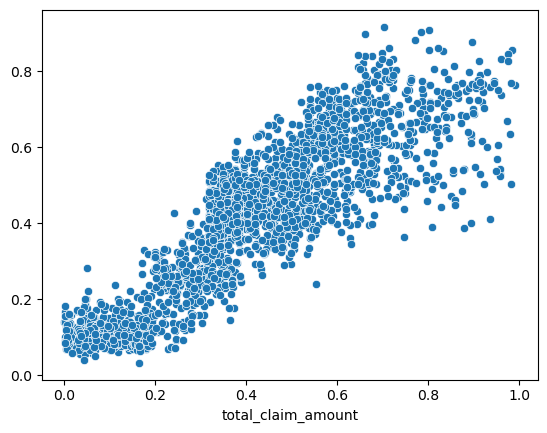

In [55]:
# MLPRegressor (Multi-layer Perceptron Regressor) - Neural Network Regression model.

from sklearn.neural_network import MLPRegressor

different_models(MLPRegressor(activation='relu', hidden_layer_sizes=(10, 100), alpha=0.001, random_state=20, early_stopping=False))

#### 6. Check and discuss the results.

"MLPRegressor is an artificial neural network model that uses backpropagation to adjust the weights between neurons in order to improve prediction accuracy" - https://vitalflux.com/sklearn-neural-network-regression-example-mlpregressor/

We got better results using **MLP Regressor**, perhaps because this Regression model has the ability to handle with large number of features and with non linear relationship between features better.